In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('bank_notes.csv',header=None)

In [3]:
data.head()

,0,1,2,3,4
0,variance,skewness,curtosis,entropy,Target
1,3.6216,8.6661,-2.8073,-0.44699,0
2,4.5459,8.1674,-2.4586,-1.4621,0
3,3.866,-2.6383,1.9242,0.10645,0
4,3.4566,9.5228,-4.0112,-3.5944,0


In [4]:
data.tail()

,0,1,2,3,4
1368,0.40614,1.3492,-1.4501,-0.55949,1
1369,-1.3887,-4.8773,6.4774,0.34179,1
1370,-3.7503,-13.4586,17.5932,-2.7771,1
1371,-3.5637,-8.3827,12.393,-1.2823,1
1372,-2.5419,-0.65804,2.6842,1.1952,1


In [5]:
data.shape

(1373, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1373 entries, 0 to 1372
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1373 non-null   object
 1   1       1373 non-null   object
 2   2       1373 non-null   object
 3   3       1373 non-null   object
 4   4       1373 non-null   object
dtypes: object(5)
memory usage: 53.8+ KB


In [7]:
data.describe()

,0,1,2,3,4
count,1373,1373,1373,1373,1373
unique,1339,1257,1271,1157,3
top,0.5706,-4.4552,4.5718,-0.9888,0
freq,5,6,5,5,762


In [8]:
data.columns = ['var','skew','curt','entr','auth']

In [9]:
print(data.head())

        var      skew      curt      entr    auth
0  variance  skewness  curtosis   entropy  Target
1    3.6216    8.6661   -2.8073  -0.44699       0
2    4.5459    8.1674   -2.4586   -1.4621       0
3     3.866   -2.6383    1.9242   0.10645       0
4    3.4566    9.5228   -4.0112   -3.5944       0


In [10]:
data = data.iloc[1: , :]

In [11]:
data.isnull().sum()

var     0
skew    0
curt    0
entr    0
auth    0
dtype: int64

In [12]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 1 to 1372
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   var     1372 non-null   object
 1   skew    1372 non-null   object
 2   curt    1372 non-null   object
 3   entr    1372 non-null   object
 4   auth    1372 non-null   object
dtypes: object(5)
memory usage: 53.7+ KB
None


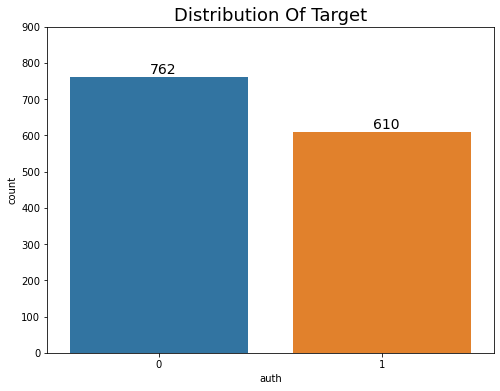

In [15]:
plt.figure(figsize=(8,6))
plt.title('Distribution Of Target', size=18)
sns.countplot(x=data['auth'])
target_count  = data.auth.value_counts()
plt.annotate(s=target_count[0],xy=(-0.04,10+target_count[0]),size=14)
plt.annotate(s=target_count[1],xy=(0.96,10+target_count[1]),size=14)
plt.ylim(0,900)
plt.show()
 
 


In [16]:
nb_to_delete = target_count[0] - target_count[1]
data = data.sample(frac=1,random_state=42).sort_values(by='auth')
data=data[nb_to_delete:]
print(data['auth'].value_counts())

0    610
1    610
Name: auth, dtype: int64


In [19]:
x = data.loc[:,data.columns != 'auth']
y = data.loc[:,data.columns == 'auth']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)


In [20]:
scalar = StandardScaler()
scalar.fit(x_train)
x_train = scalar.transform(x_train)
x_test = scalar.transform(x_test)



In [21]:
clf = LogisticRegression(solver='lbfgs',random_state=42,multi_class='auto')
clf.fit(x_train,y_train.values.ravel())

LogisticRegression(random_state=42)

In [23]:
y_pred = np.array(clf.predict(x_test))
conf_mat = pd.DataFrame(confusion_matrix(y_test,y_pred),columns=['Pred.Negative','Pred.Positive'],index=['Act.Negative','Act.Positive'])
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
accuracy = round((tn+tp)/(tn+fp+fn+tp),4)
print(conf_mat)
print(f'\n Accuracy={round(100*accuracy, 2)}%')

              Pred.Negative  Pred.Positive
Act.Negative            187              6
Act.Positive              0            173

 Accuracy=98.36%
